# BANK-FULL EDA

Dataset (https://www.kaggle.com/datasets/krantiswalke/bankfullcsv)

Data tersebut terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) memutuskan untuk berlangganan atau tidak.

## Description

> Input Variable
- age - Umur klien
- job - Kategori pekerjaan klien ("admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
- marital - status perkawinan
- education - kategori pendidikan klien ("unknown","secondary","primary","tertiary")
- default - memiliki kredit bawaan ("yes","no")
- balance - rata-rata saldo per tahun (euro)
- housing - memiliki pinjaman rumah("yes","no")
- loan - memliki pinjaman pribadi ("yes","no")
- contact - jenis komunikasi kontak ("unknown","telephone","cellular")
- day - hari kontak terakhir bulanan
- month - bulan kontak terakhir bulanan ("jan"-"dec")
- duration - durasi kontak terakhir, dalam detik
- campaign - jumlah kontak yang dilakukan selama kampanye pada klien
- pdays - jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya
- previous - jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini
- poutcome - hasil dari kampanye pemasaran sebelumnya ("unknown","other","failure","success")

> Output Variable
- target - apakah klien telah berlangganan deposito berjangka? ("yes","no")

## Import Library

In [3]:
# import semua libabry nya
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import warnings 
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

## Overview

> Memuat data CSV dengan nama file bank-full.csv yang berada pada MES\W5D1 Phyton\data\bank-full.csv

> Direktori penyimpanan file bisa berbeda-beda

In [4]:
df = pd.read_csv('data/bank-full.csv')

In [5]:
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [8]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
14082,55,management,married,tertiary,no,561,no,yes,cellular,11,jul,318,2,-1,0,unknown,no
37055,36,blue-collar,single,secondary,no,478,yes,no,cellular,13,may,610,1,-1,0,unknown,yes
4980,29,blue-collar,single,secondary,no,0,no,no,unknown,21,may,623,1,-1,0,unknown,no
6256,27,self-employed,single,tertiary,no,270,yes,no,unknown,27,may,470,2,-1,0,unknown,no
24834,47,management,divorced,tertiary,no,428,yes,no,cellular,18,nov,116,1,167,1,other,no


> Tabel di atas memuat 5 data teratas, 5 data terbawah, dan 5 data acak.

In [9]:
df.shape

(45211, 17)

> Data Frame ini memiliki 45211 baris data dan 17 kolom (attribut)

In [10]:
# summary dari setiap features pada dataset ini
pd.DataFrame({'Features' : df.columns, 'dataType' : df.dtypes.values, 
              'nullvalues' : [df[i].isna().sum() for i in df.columns],
              'unique' : [df[i].nunique() for i in df.columns],
              'uniqueSample' : [list(pd.Series(df[i].unique()).sample(1)) for i in df.columns]}).reset_index(drop = True)

,Features,dataType,nullvalues,unique,uniqueSample
0,age,int64,0,77,[32]
1,job,object,0,12,[services]
2,marital,object,0,3,[single]
3,education,object,0,4,[tertiary]
4,default,object,0,2,[no]
5,balance,int64,0,7168,[8938]
6,housing,object,0,2,[no]
7,loan,object,0,2,[no]
8,contact,object,0,3,[telephone]
9,day,int64,0,31,[30]


> Pada tabel di atas kita dapat melihat attribute index, features, data type, null values, unique, dan unique sample.

> Pada data ini, dapat dilihat tidak ada null values

## Preprocessing

> Dataset bank-full tidak memiliki nilai null dan semua kolom memiliki tipe data yang benar menurut kamus data. Jadi kita hanya perlu memisahkan data numerik dan kategorik.

> Kita bisa menghapus kolom 'day','month','contact', dan 'poutcome' karena tidak memiliki efek yang terlalu besar dalam analisis.

> Kita bisa menambah kolom 'Target_encode' yang sebelumnya memiliki tipe data object menjadi int agar dapat dimasukkan ke dalam Numerical Features

In [11]:
df = df.drop(['day', 'month', 'contact', 'poutcome'], axis=1)
#drop columns

In [12]:
label_encoder = LabelEncoder()
df['Target-encode'] = label_encoder.fit_transform(df['Target'])

In [13]:
df_num = df.select_dtypes(['int64', 'float64','int32'])
#var for numerical

In [14]:
df_cat = df.select_dtypes(['object'])
#var for categorical

In [15]:
# summary dari setiap features pada dataset ini
pd.DataFrame({'Features' : df.columns, 'dataType' : df.dtypes.values, 
              'nullvalues' : [df[i].isna().sum() for i in df.columns],
              'unique' : [df[i].nunique() for i in df.columns],
              'uniqueSample' : [list(pd.Series(df[i].unique()).sample(1)) for i in df.columns]}).reset_index(drop = True)

,Features,dataType,nullvalues,unique,uniqueSample
0,age,int64,0,77,[48]
1,job,object,0,12,[housemaid]
2,marital,object,0,3,[single]
3,education,object,0,4,[tertiary]
4,default,object,0,2,[no]
5,balance,int64,0,7168,[2717]
6,housing,object,0,2,[yes]
7,loan,object,0,2,[yes]
8,duration,int64,0,1573,[1031]
9,campaign,int64,0,48,[17]


> Menggunakan describe() pada numerical features untuk melihat ukuran tendensi sentral, kuartil, min, dan maks untuk setiap kolom.

> Menggunakan describe() pada categorical features untuk melihat jumlah data, data unik, dan frekuensi data yang paling banyak muncul.

In [16]:
df_num.describe()

,age,balance,duration,campaign,pdays,previous,Target-encode
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [17]:
df_cat.describe(include='object').T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
Target,45211,2,no,39922


## Exploratory Data Analysis

> Kita akan mulai menganalisa dengan melihat target feature terlebih dahulu.

### Target Feature

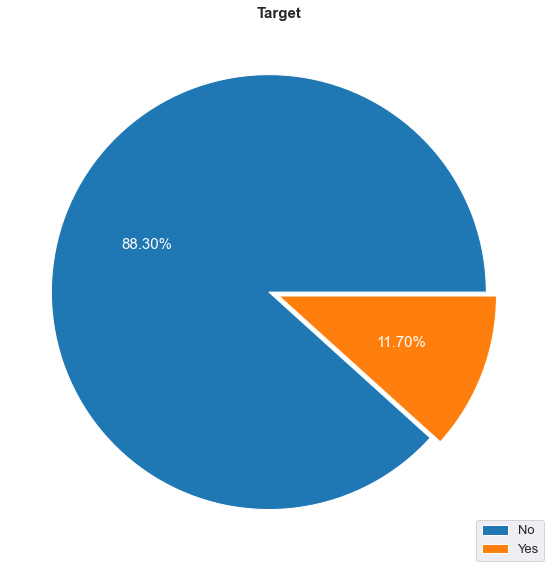

In [18]:
plt.figure(figsize = (10, 10))
plt.title('Target', size = 15, fontweight = 'bold')
labels = 'No', 'Yes'
plt.pie(df['Target'].value_counts(), autopct = '%.2f%%', 
        textprops = {'fontsize' : 15, 'color' : 'white'}, explode = (0.05,0))
plt.legend(labels, loc='lower right', fontsize = 13)
plt.show()

In [19]:
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

> Terlihat pada chart di atas sebanyak 88.30% (39922) data tidak berlangganan produk dan yang berlangganan produk hanya 11.70% (5289) data. 

### Numerical Features

> Pertama kita dapat membuat heatmap terlebih dahulu untuk melihat korelasi pada setiap features

<AxesSubplot:>

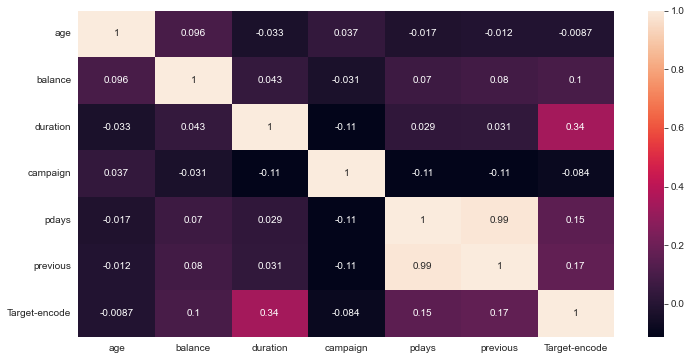

In [20]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_num.corr('spearman'), annot=True)

> Pada heatmap di atas kita dapat melihat bahwa 'previous' dengan 'pdays' memiliki **korelasi kuat** mencapai 0.99

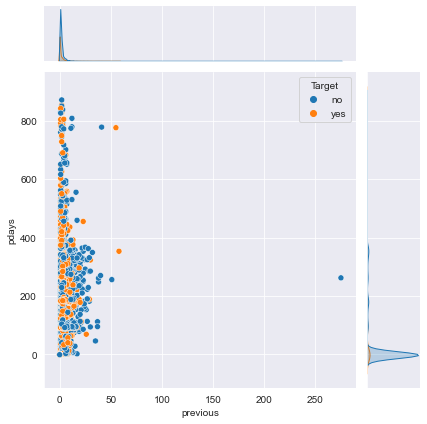

In [21]:
sns.jointplot(x=df['previous'], y=df['pdays'], data=df, hue='Target')

> Dari pairplot di atas, kita tidak menemukan pola klien yang berlangganan deposito berjangka karena datanya **menumpuk di area yang sama**. Dapat dilihat juga bahwa **Target** klien menyebar dengan rata dan tidak memunculkan sebuah pola antara klien yang berlangganan maupun tidak.

> Selanjutnya, kita akan melakukan analtsis menyeluruh pada numerical features

> kita dapat membuat function untuk visuaisasi data yang lebih mudah

In [22]:
def plot_num(segment_by,target_var = "Target"):
    target_y = df[(df['Target'] == 'yes')][segment_by]
    target_n = df[(df['Target'] == 'no')][segment_by]

    plt.figure(figsize=(10,5))  
    plt.title("Distribution of Subs by "+segment_by)
    plt.ylabel("Frequency")
    sns.distplot(a = df[segment_by])
    
    ax = sns.kdeplot(target_y,shade=True,color='#008000')
    ax = sns.kdeplot(target_n,shade=True,color='#ff0000')
    ax.legend(['Distribution','Yes','No'])

    plt.show()

    print("Subs by ",segment_by)
    print(target_y.value_counts().head(3))
    print('-----------------------------')
    print("Not Subs by ",segment_by)
    print(target_n.value_counts().head(3))

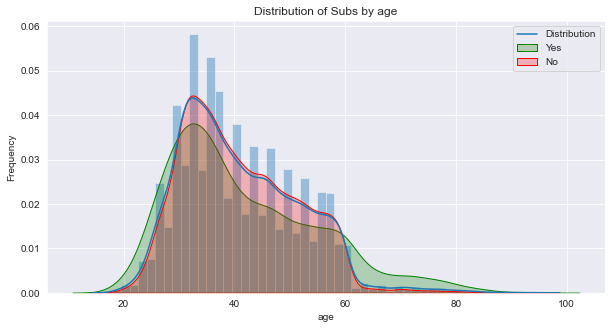

Subs by  age
32    221
30    217
33    210
Name: age, dtype: int64
-----------------------------
Not Subs by  age
32    1864
31    1790
33    1762
Name: age, dtype: int64


In [23]:
plot_num(segment_by='age')

>Dari data di atas terlihat bahwa banyak klien yang berlangganan adalah klien yang berusia antara 30-33 tahun. Namun masih banyak klien di kisaran usia yang sama tidak berlangganan deposito.

>Dapat dilihat, untuk klien yang berusia 60 ahun ke atas cenderung untuk berlangganan deposito karena memasuki masa pensiun, berbeda dengan klien yang berada di kisaran usia 30-40 tahun yang mungkin masih bekerja dengan aktif dan mungkin memliki tanggungan hidup sehingga tidak memungkinkan unutk berlangganan deposito.

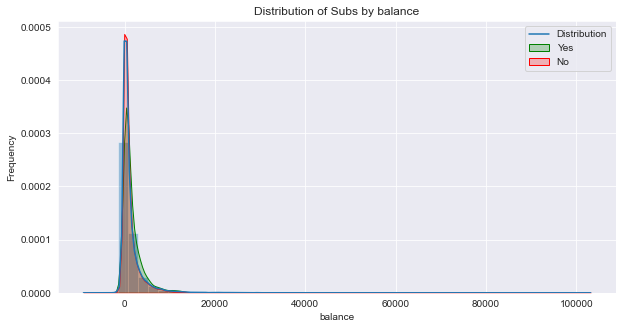

Subs by  balance
0    292
1     17
2     16
Name: balance, dtype: int64
-----------------------------
Not Subs by  balance
0    3222
1     178
2     140
Name: balance, dtype: int64


In [24]:
plot_num(segment_by='balance')

>Jumlah saldo tidak terlalu mempengaruhi jumlah pelanggan deposit, klien dengan jumlah saldo di atas 1500 euro cenderung tidak memilih untuk berlangganan deposit dibanding klien dengan saldo dibawah 1500 euro per tahun.

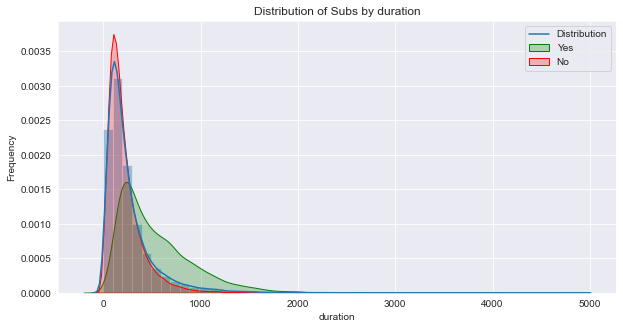

Subs by  duration
261    19
226    17
229    16
Name: duration, dtype: int64
-----------------------------
Not Subs by  duration
124    182
90     181
114    171
Name: duration, dtype: int64


In [25]:
plot_num(segment_by='duration')

> Durasi komunikasi dengan klien secara singkat (< 124s) tidak terlalu mempengaruhi klien untuk berlangganan deposito, namun seperti data yang tertera di atas, komunikasi yang dilakukan lebih dari 3 menit (> 260s) memberikan peningkatan dimana beberapa klien memutuskan untuk berlangganan deposito karena follow up yang dilakukan terhadap klien.

> Untuk lebih lanjut dapat dilihat pada pairplot di bawah yang memperlihatkan sebuah pola dimana meningkatnya umur dan durasi komunikasi pada klien mempengaruhi jumlah klien yang berlangganan

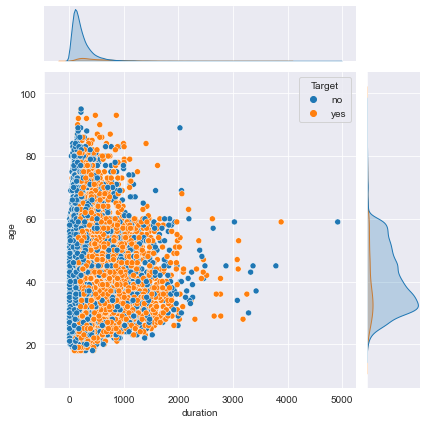

In [26]:
sns.jointplot(x=df['duration'], y=df['age'], data=df, hue='Target')

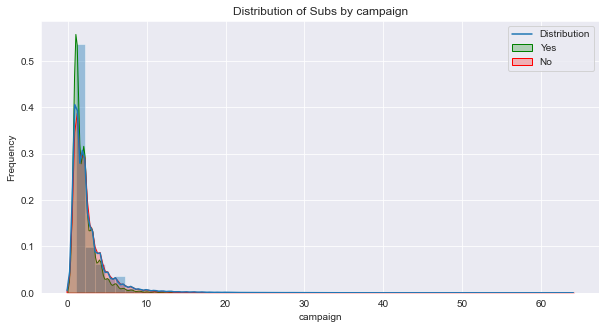

Subs by  campaign
1    2561
2    1401
3     618
Name: campaign, dtype: int64
-----------------------------
Not Subs by  campaign
1    14983
2    11104
3     4903
Name: campaign, dtype: int64


In [27]:
plot_num(segment_by='campaign')

> Klien cenderung memilih untuk berlanggan di kali pertama kampanye. Kampanye yang dilakukan untuk kali pertama mempengaruhi keputusan klien dalam berlangganan. Memberikan pilihan deposito yang tepat akan mempengaruhi jumlah durasi komunikasi yang membuat klien lebih cepat dalam mengambil keputusan untuk berlangganan deposito.

### Categorical Features

> Sama seperti pada numerical features, kita membuat heatmap untuk mencari korelasi pada setiap features

In [28]:
# cramers untuk categorical feature correlation
def cramersv(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))

In [29]:
corr = []
for i in df_cat:
    matrix = []
    for j in df_cat:
        matrix.append(cramersv(df_cat[i], df_cat[j]))
    corr.append(matrix)

corr_cat = pd.DataFrame(corr, index=df_cat.columns, columns=df_cat.columns)

<AxesSubplot:>

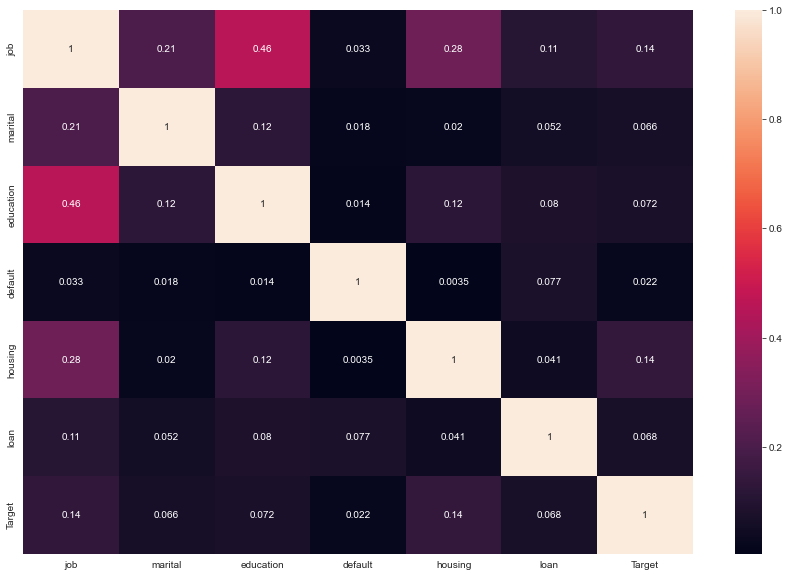

In [30]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_cat, annot=True)

> Pada heat map di atas, kita bisa melihat kolom **'education'** dengan **'job'** memiliki korelasi yang hanya mencapai **0.46** sebagai korelasi tertinggi pada categorical features.

In [31]:
pd.crosstab(df['job'], df['education'], normalize = 'columns')

education,primary,secondary,tertiary,unknown
job,,,,
admin.,0.030506,0.181838,0.043004,0.092084
blue-collar,0.548533,0.231489,0.011202,0.244480
entrepreneur,0.026711,0.023360,0.051575,0.040926
housemaid,0.091519,0.017024,0.013007,0.024233
management,0.042913,0.048315,0.586497,0.130318
retired,0.116041,0.042410,0.027517,0.064082
self-employed,0.018975,0.024869,0.062627,0.021002
services,0.050358,0.148996,0.015187,0.080775
student,0.006422,0.021895,0.016766,0.087776


> Padat crosstab di atas dapat diketahui bahwa:
- Klien dengan primary education kebanyakan bekerja sebagai blue-collar
- Klien dengan secondary education kebanyakan bekerja sebagai blue-collar dan technician
- Klien dengan tertiary education kebanyakan bekerja sebagai management
- Klien dengan unknown education kebanyakan bekerja sebagai blue-collar

> Kita akan melakukan analysis menyeluruh pada categorical features

> Kita dapat membuat function untuk visualisasi data

In [32]:
def cat_plot(segment_by,target_var ="Target"):
    plt.figure(figsize=(10,5))
    sns.countplot(x =segment_by,data=df_cat,hue="Target")
    plt.xticks(rotation=45)
    plt.title("Count of "+segment_by)
    plt.show()

    target_y = df[(df['Target'] == 'yes')][segment_by]
    target_n = df[(df['Target'] == 'no')][segment_by]

    print("Subs by ",segment_by)
    print(target_y.value_counts().head(3))
    print('-----------------------------')
    print("Not Subs by ",segment_by)
    print(target_n.value_counts().head(3))

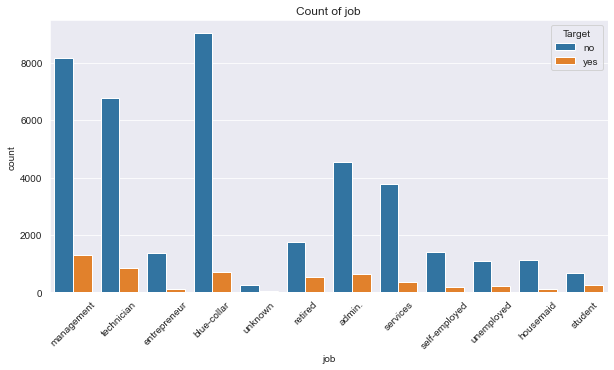

Subs by  job
management     1301
technician      840
blue-collar     708
Name: job, dtype: int64
-----------------------------
Not Subs by  job
blue-collar    9024
management     8157
technician     6757
Name: job, dtype: int64


In [33]:
cat_plot(segment_by='job')

> Dari sini dapat disimpulkan bahwa klien yang bekerja sebagai **management** memperoleh 1301 klien berlangganan. Sedangkan untuk yang tidak berlangganan didominasi oleh klien yang bekerja sebagai blue-collar sebanyak 9024 klien yang tidak berlangganan. Di sisi lain pekerjaan klien tidak terlalu mempengaruhi untuk berlangganan deposito dikarenakan klien yang bekerja sebagai **management** berjumlah 8157 memutuskan untuk tidak berlangganan deposito.

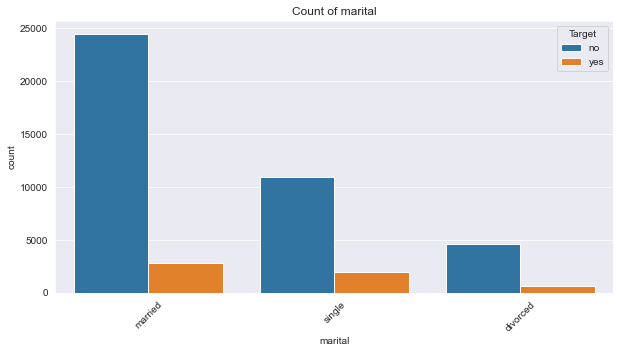

Subs by  marital
married     2755
single      1912
divorced     622
Name: marital, dtype: int64
-----------------------------
Not Subs by  marital
married     24459
single      10878
divorced     4585
Name: marital, dtype: int64


In [34]:
cat_plot(segment_by='marital')

> Sebanyak 2755 klien yang sudah menikah memutuskan untuk berlangganan deposito, namun 24459 klien yang sudah menikah menolak untuk berlangganan deposito. Ini membuat klien yang sudah menikah menjadi peminat tertinggi dan penolak tertinggi dalam berlangganan deposito.

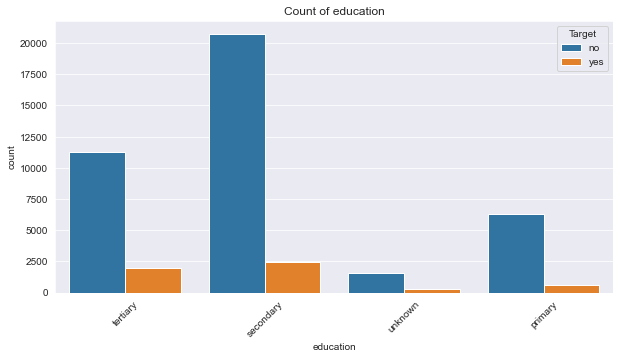

Subs by  education
secondary    2450
tertiary     1996
primary       591
Name: education, dtype: int64
-----------------------------
Not Subs by  education
secondary    20752
tertiary     11305
primary       6260
Name: education, dtype: int64


In [35]:
cat_plot(segment_by='education')

> Sama seperti klian yanng sudah menikah, klien yang memiliki **secondary** education menjadi peminat tertinggi sebanyak 2450 klien dan penolak tertinggi sebanyak 20752 klien yang berlangganan deposito.

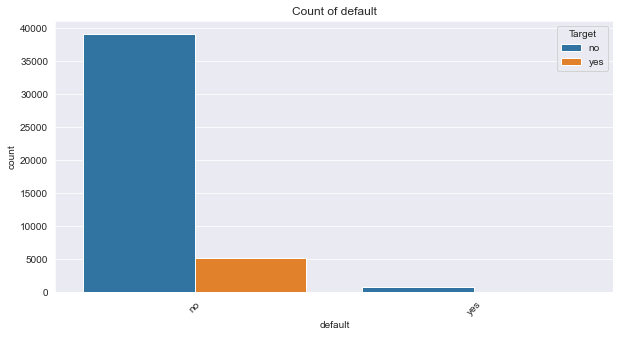

Subs by  default
no     5237
yes      52
Name: default, dtype: int64
-----------------------------
Not Subs by  default
no     39159
yes      763
Name: default, dtype: int64


In [36]:
cat_plot(segment_by='default')

> Dari data di atas, kita dapat mengetahui bahwa klien yang tidak memiliki kredit bawaan memiliki pelanggan sebanyak 5237 klien dan menolak tawaran deposito sebanyak 39159 klien

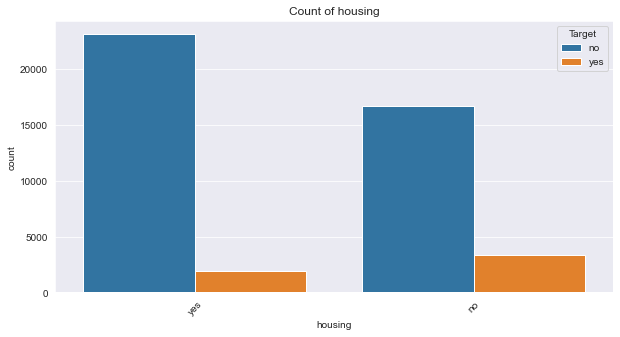

Subs by  housing
no     3354
yes    1935
Name: housing, dtype: int64
-----------------------------
Not Subs by  housing
yes    23195
no     16727
Name: housing, dtype: int64


In [37]:
cat_plot(segment_by='housing')

> Dari data di atas terlihat bahwa klien yang memiliki kredit kepemilikan rumah merupakan nasabah yang paling banyak menolak 23195 klien, sedangkan yang paling berminat adalah klien yang tidak memiliki kredit kepemilikan rumah sebanyak 3354. Ini bisa saja terjadi karena klien yang memiliki kredit kepemilikan rumah memiliki pengeluaran yang lebih besar sehingga memberikan kemungkinan untuk tidak berlangganan deposito.

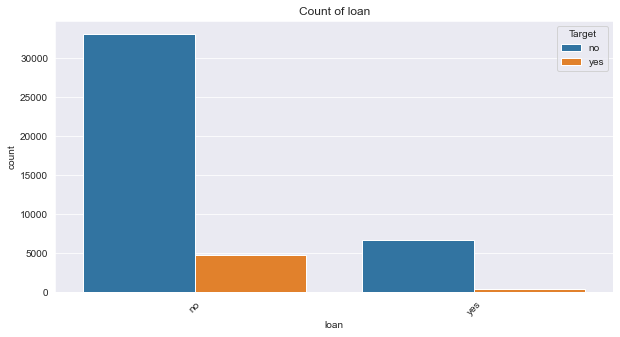

Subs by  loan
no     4805
yes     484
Name: loan, dtype: int64
-----------------------------
Not Subs by  loan
no     33162
yes     6760
Name: loan, dtype: int64


In [38]:
cat_plot(segment_by='loan')

> Klien yang tidak memiliki kredit menjadi peminat terbanyak dalam berlangganan deposito sebanyak 4805 klien dan penolak terbanyak sebanyak 33162 klien.

### Summary

> Berdasarkan feature target yang di perlihatkan dengan pie chart, kita dapat melihat bahwa dataset ini memiliki total 45211 data klien, sebanyak 39922 (88.30%) klien tidak berlangganan deposito dan sebanyak 5289 (11.70%) klien berlangganan produk (deposito berjangka)

> Beberapa informasi yang diperoleh dari analisis pada Numerical Features antara lain
- Kebanyak klien dengan usia di atas 60 tahun memutuskan untuk berlangganan deposito.
- Durasi komunikasi secara berkelanjutan memungkinkan klien untuk berlangganan deposito
- Sangat penting untuk membuat klien terkesan dalam kali pertama kampanye untuk menarik minat klien dalam berlanggana deposito

> Beberapa informasi yang diperoleh dari analisis pada Numerical Features antara lain
- Klien yang bekerja sebagai management memiliki ketertarikan untuk berlangganan deposito
- Klien dengan secondary education memiliki ketertarikan untuk berlangganan deposito walaupun didasari dengan pekerjaan yang didominasi sebagai blue-collar dan technician
- Klien yang memiliki kredit kepemilika rumah maupun kredit lainnya kurang memiliki ketertarikan untuk berlangganan deposito oleh karena ada nya pengeluaran lebih yang membuat ketidaktertarikan untuk berlangganan.